# Analises das Comunicações

> Base de Dados contendo as solicitações geradas na Central 156, principal canal de comunicação entre o cidadão e a Prefeitura Municipal de Curitiba. Inclui todas as demandas direcionadas às Secretarias e Órgãos da Administração Municipal. Estes dados são oriundos do Sistema Integrado de Atendimento ao Cidadão - SIAC.

 -- Table: gpmc_156_102017

CREATE TABLE gpmc_156_102017
(
  solicitacao integer,
  tipo character varying(25),
  orgao character varying(50),
  data character(10),
  horario time without time zone,
  assunto character varying(100),
  subdivisao character varying(100),
  descricao text,
  logradouro_ass character varying(200),
  bairro_ass character varying(25),
  regional_ass character varying(50),
  meio_resposta character varying(25),
  observacao text,
  sexo character(1),
  bairro_cidadao character varying(200),
  regional_cidadao character varying(50),
  data_nasc character varying(25),
  tipo_cidadao character varying(25),
  orgao_resp character varying(200),
  resposta_final text,
  extra text,
  extra2 text,
  lat double precision,
  lon double precision
)

In [1]:
# -*- coding: utf-8 -*-
execfile("includes.py")
%matplotlib inline

init() #configure the size of figures

## Numero de Comunicações por Bairro

### 10 com mais Comunicações

In [2]:
df_bairros = sqlDataFrame("""SELECT bairro_ass, count(distinct solicitacao) as num
    FROM gpmc_156_102017
    GROUP BY bairro_ass
    ORDER by num DESC LIMIT %s""", 10)

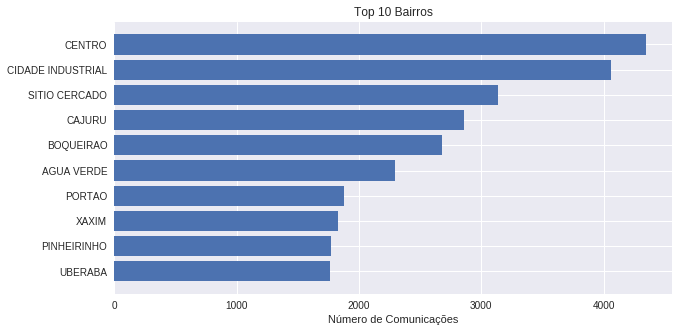

In [3]:
#sort the values ascending to invert the bars
sub_sorted = df_bairros.sort_values("num", ascending=True)

# plot bar
pos = np.arange(len(sub_sorted))
plt.barh(pos, sub_sorted.num)
plt.yticks(pos, sub_sorted.bairro_ass); # plot subject names on y
plt.title("Top 10 Bairros")
plt.xlabel("Número de Comunicações".decode('utf-8'))
#plt.xlim(0, right=100)
plt.show()

### 10 com menos Comunicações

In [4]:
df_bairros = sqlDataFrame("""SELECT bairro_ass, count(distinct solicitacao) as num
    FROM gpmc_156_102017
    GROUP BY bairro_ass
    ORDER by num ASC LIMIT %s""", 10)

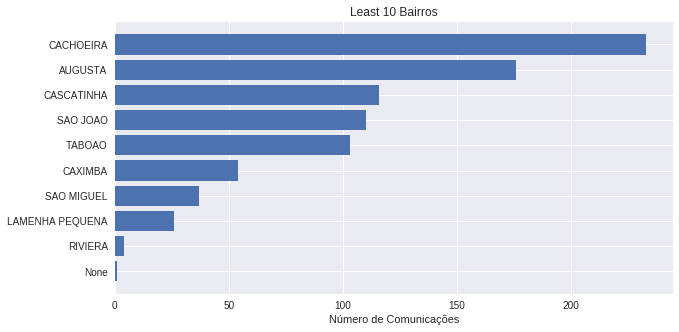

In [5]:
#sort the values ascending to invert the bars
sub_sorted = df_bairros.sort_values("num", ascending=True)

# plot bar
pos = np.arange(len(sub_sorted))
plt.barh(pos, sub_sorted.num)
plt.yticks(pos, sub_sorted.bairro_ass); # plot subject names on y
plt.title("Least 10 Bairros")
plt.xlabel("Número de Comunicações".decode('utf-8'))
#plt.xlim(0, right=100)
plt.show()

## Numero de Reclamações por Assunto (Top 10)

In [6]:
#select the top 10 complains from db
df2 = sqlDataFrame("""SELECT assunto, count(distinct solicitacao) as num
    FROM gpmc_156_102017
    GROUP BY assunto
    ORDER by num DESC LIMIT %s""", 10)

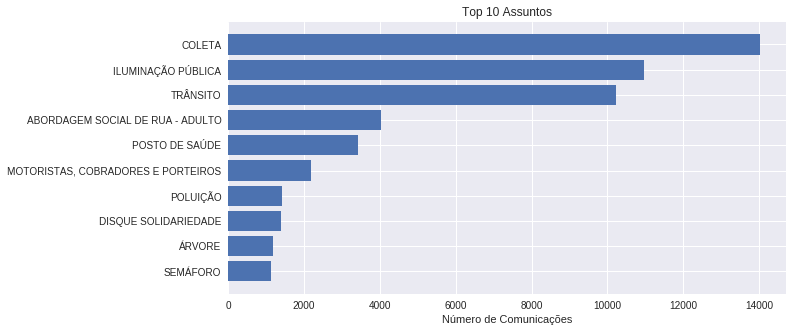

In [7]:
#sort the values ascending to invert the bars
sub_sorted = df2.sort_values("num", ascending=True)

# plot bar
pos = np.arange(len(sub_sorted))
plt.barh(pos, sub_sorted.num)
plt.yticks(pos, sub_sorted.assunto); # plot subject names on y
plt.title("Top 10 Assuntos")
plt.xlabel("Número de Comunicações".decode('utf-8'))
#plt.xlim(0, right=100)
plt.show()

## Tipos de Comunicações

In [8]:
dfX = sqlDataFrame("""SELECT tipo, count(distinct solicitacao) as num
    FROM gpmc_156_102017
    GROUP BY tipo
    ORDER by num""")

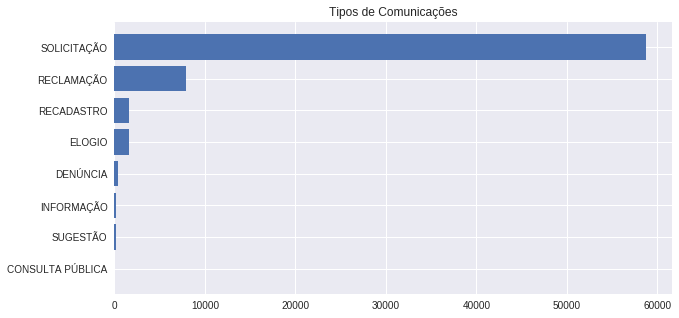

In [9]:
#dfX.loc[dfX['tipo'] == 'SOLICITAÇÃO'.decode('utf-8'), 'tipo'] = 'REQUEST'.decode('utf-8')


sub_sorted = dfX.sort_values("num", ascending=True)

# plot bar
pos = np.arange(len(sub_sorted))
plt.barh(pos, sub_sorted.num)
plt.yticks(pos, sub_sorted.tipo); # plot subject names on y
plt.title("Tipos de Comunicações".decode('utf-8'))
#plt.xlabel("Porcentagem")
#plt.xlim(0, right=100)
plt.show()

## Top Subjects per Cluster

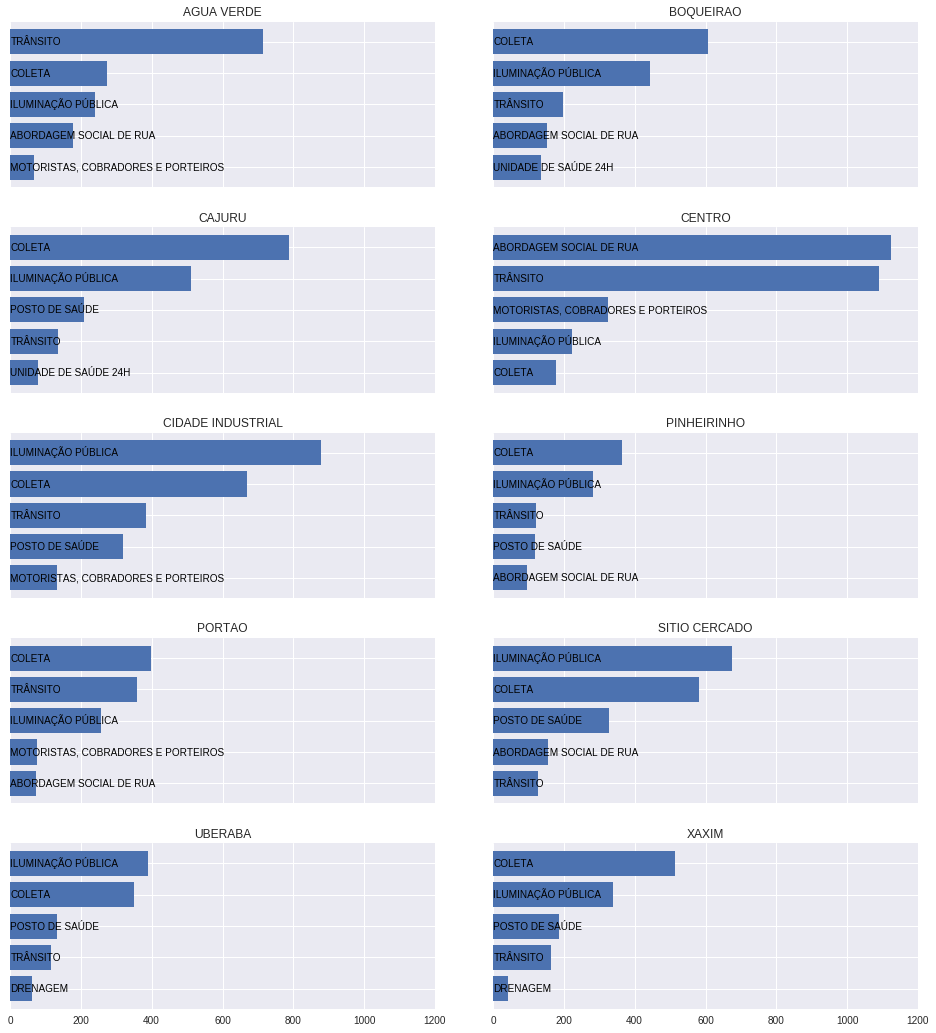

In [10]:
df3 = sqlDataFrame("""SELECT bairro_ass, assunto, count(distinct solicitacao) AS num
    FROM gpmc_156_102017
    WHERE bairro_ass IN (
	SELECT bairro_ass
	FROM gpmc_156_102017
	GROUP BY bairro_ass
	ORDER by count(distinct solicitacao) DESC 
	LIMIT 10)
    GROUP BY bairro_ass, assunto
    order by bairro_ass, num DESC""")

#select the top 5 of each group
df3 = df3.groupby("bairro_ass").head(5)

#simplify the names to display on graph
df3.loc[df3['assunto'] == 'ABORDAGEM SOCIAL DE RUA - ADULTO', 'assunto'] = 'ABORDAGEM SOCIAL DE RUA'
df3.loc[df3['assunto'] == 'FISCALIZAÇÃO DE TERRENOS BALDIOS OU EDIFICADOS'.decode('utf-8'), 'assunto'] = 'FISCALIZAÇÃO DE TERRENOS'.decode('utf-8')


w=2 #width of subplot
h=5 #height of subplot

#creates a grid with 
fig, axarr = plt.subplots(h, w, figsize=(13,14), sharex='all')
fig.tight_layout(pad=0, w_pad=3, h_pad=3)

pos= np.arange(5)

grupos = df3["bairro_ass"].unique()

for i in np.arange(h):
    for j in np.arange(w):
        
        grupo = grupos[((i*2) + j)]        
        grupo_df = df3[df3["bairro_ass"] == "%s" % grupo]
        axarr[i, j].set_title('%s' % grupo)
        axarr[i, j].barh(pos, grupo_df.num)
        axarr[i, j].set_yticklabels([])
        axarr[i, j].invert_yaxis()        
        for k in pos:
            axarr[i,j].annotate(grupo_df.assunto.iloc[k], (1,(pos[k])+0.1), color="black")
plt.xlim(0, 1200)
plt.show()

## Número de Comunicações por Dia da Semana

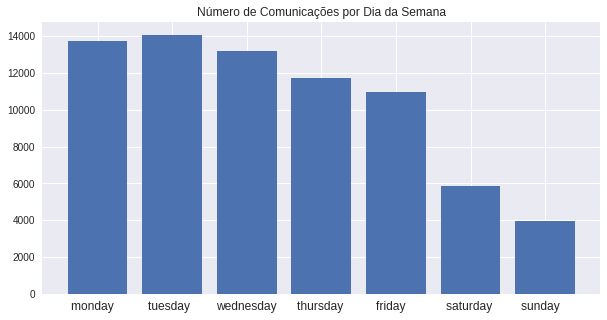

In [11]:
#select the top 10 complains from db
df2 = sqlDataFrame("""SELECT day_of_week, day_of_week2, count(*) as num
    FROM gpmc_156_102017
    GROUP BY day_of_week, day_of_week2
    ORDER BY day_of_week;""")

# plot bar
pos = np.arange(len(df2))
plt.figure(figsize=(10,5))
plt.bar(pos, df2.num)
plt.xticks(pos, df2.day_of_week2, size=12); # plot subject names on y
plt.title("Número de Comunicações por Dia da Semana".decode('utf-8'))
plt.show()

## Número de Comunicações por Hora do Dia (Dia Útil x Fim de Semana)

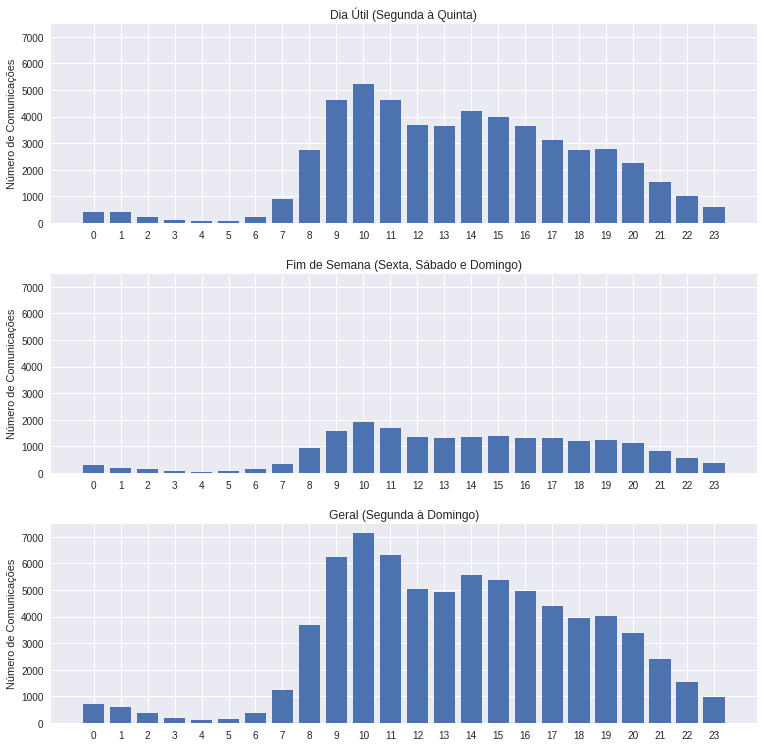

In [12]:
df2 = sqlDataFrame("""SELECT hora, day_of_week
    FROM gpmc_156_102017""")

alldays = df2
alldays = alldays.assign(ones = 1) #creates a new column and assign one to all values
alldays = alldays[['hora', 'ones']] #select only these two columns
alldays_grp = alldays.groupby("hora", as_index=False).agg("sum") #group by hour
alldays_grp = alldays_grp.sort_values(by="hora", ascending=True) #sort by hour

weekday = df2[df2['day_of_week'].isin([1,2,3,4])] #select weekdays
weekday = weekday.assign(ones = 1) #creates a new column and assign one to all values
weekday = weekday[['hora', 'ones']] #select only these two columns
weekday_grp = weekday.groupby("hora", as_index=False).agg("sum") #group by hour
weekday_grp = weekday_grp.sort_values(by="hora", ascending=True) #sort by hour

weekend = df2[df2['day_of_week'].isin([5,6,7])] #select weekends
weekend = weekend.assign(ones = 1)
weekend = weekend[['hora', 'ones']]
weekend_grp = weekend.groupby("hora", as_index=False).agg("sum")
weekend_grp = weekend_grp.sort_values(by="hora", ascending=True)

#creates a grid for graphs
fig, axarr = plt.subplots(3, 1, figsize=(10.2,10), sharey="col")
fig.tight_layout(pad=0, w_pad=0, h_pad=3)
axarr

x = np.array(weekday_grp.hora) #create an array of labels
pos= np.arange(len(weekday_grp))
axarr[0].set_title('Dia Útil (Segunda à Quinta)'.decode('utf-8'))
axarr[0].bar(pos, weekday_grp.ones)
axarr[0].set_xticks(pos)
axarr[0].set_xticklabels(x)
axarr[0].set_ylabel('Número de Comunicações'.decode('utf-8'))


x = np.array(weekend_grp.hora)
pos= np.arange(len(weekend_grp))
axarr[1].set_title('Fim de Semana (Sexta, Sábado e Domingo)'.decode('utf-8'))
axarr[1].bar(pos, weekend_grp.ones)
axarr[1].set_ylabel('Número de Comunicações'.decode('utf-8'))
axarr[1].set_xticks(pos)
axarr[1].set_xticklabels(x)


x = np.array(alldays_grp.hora) #create an array of labels
pos= np.arange(len(alldays_grp))
axarr[2].set_title('Geral (Segunda à Domingo)'.decode('utf-8'))
axarr[2].bar(pos, alldays_grp.ones)
axarr[2].set_xticks(pos)
axarr[2].set_xticklabels(x)
axarr[2].set_ylabel('Número de Comunicações'.decode('utf-8'))

plt.show()

## Comunicações por Categoria e Dia da Semana (Útil x Fim)

In [13]:
df2 = sqlDataFrame("""SELECT assunto, day_of_week
    FROM gpmc_156_102017""")

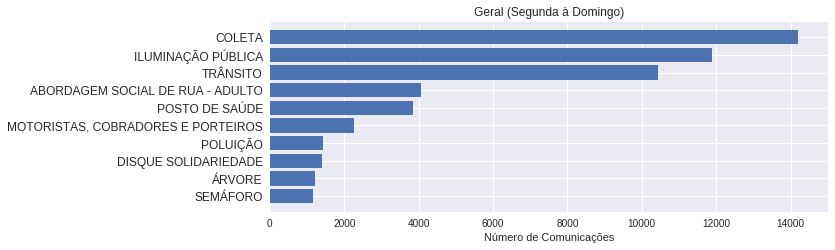

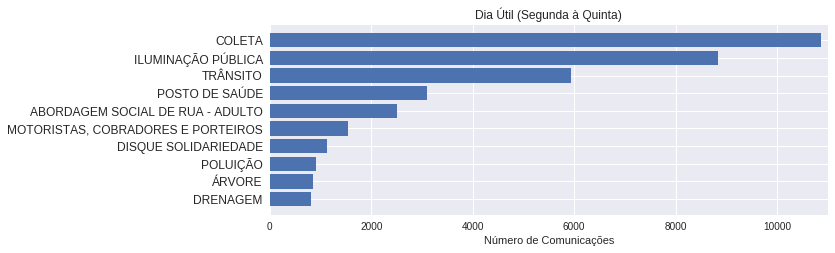

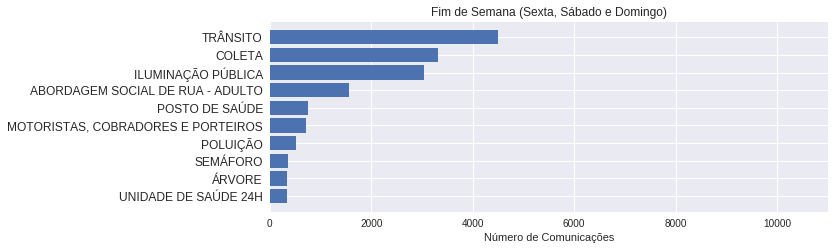

In [14]:
#All Days
alldays = df2
alldays = alldays.assign(ones = 1)
alldays = alldays[['assunto', 'ones']]
alldays_grp = alldays.groupby("assunto", as_index=False).agg("sum")
alldays_grp = alldays_grp.sort_values(by="ones", ascending=True).tail(10)

pos = np.arange(len(alldays_grp))
plt.figure(figsize=(10,3.5))
plt.barh(pos, alldays_grp.ones)
plt.yticks(pos, alldays_grp.assunto, size=12); # plot subject names on y
plt.title('Geral (Segunda à Domingo)'.decode('utf-8'))
plt.xlabel('Número de Comunicações'.decode('utf-8'))
plt.xlim([0, 15000])
plt.show()

#Weekday
weekday = df2[df2['day_of_week'].isin([1,2,3,4])]
weekday = weekday.assign(ones = 1)
weekday = weekday[['assunto', 'ones']]
weekday_grp = weekday.groupby("assunto", as_index=False).agg("sum")
weekday_grp=weekday_grp.sort_values(by="ones", ascending=True).tail(10)

pos= np.arange(len(weekday_grp))
plt.figure(figsize=(10,3.5))
plt.barh(pos, weekday_grp.ones)
plt.title('Dia Útil (Segunda à Quinta)'.decode('utf-8'))
plt.yticks(pos, weekday_grp.assunto, size=12); # plot subject names on y
plt.xlabel('Número de Comunicações'.decode('utf-8'))
plt.xlim([0, 11000])
plt.show()

#Weekend
weekend = df2[df2['day_of_week'].isin([5,6,7])]
weekend = weekend.assign(ones = 1)
weekend = weekend[['assunto', 'ones']]
weekend_grp = weekend.groupby("assunto", as_index=False).agg("sum")
weekend_grp=weekend_grp.sort_values(by="ones", ascending=True).tail(10)

pos= np.arange(len(weekend_grp))
plt.figure(figsize=(10,3.5))
plt.barh(pos, weekend_grp.ones)
plt.title('Fim de Semana (Sexta, Sábado e Domingo)'.decode('utf-8'))
plt.yticks(pos, weekend_grp.assunto, size=12); # plot subject names on y
plt.xlabel('Número de Comunicações'.decode('utf-8'))
plt.xlim([0, 11000])
plt.show()